In [1]:
from threshold import MultiStairCase
import matplotlib.pyplot as plt
import numpy as np

## Function used to simulate data

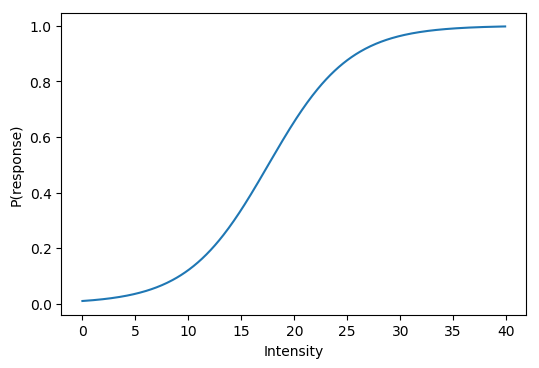

In [2]:
x = np.arange(0, 40, 0.1)
y = MultiStairCase.func(x, 100, 1.3)
plt.figure(dpi=100)
plt.xlabel("Intensity")
plt.ylabel("P(response)")
plt.plot(x, y);

## Create multistaircase object

Default is 2 interleaved estimators, here we set to run 40 trials per estimator with a starting value of 20

In [3]:
multistair = MultiStairCase(40, 20)

## Run "trials" with simulated responses

In [4]:
for n, stim_level in enumerate(multistair):

    print("Calibration trial {0} / {1}\n" \
          "Stimulation level = {2}\n" \
          "-----------------------------".format(n + 1, 40, stim_level))

    response = MultiStairCase.func(stim_level, 100, 1.3)
    print "Response = " + str((np.random.random(1) < response).astype(int)[0])
    print "-----------------------------"

    multistair.add_response((np.random.random(1) < response).astype(int)[0])


nan
Calibration trial 1 / 40
Stimulation level = 20
-----------------------------
Response = 0
-----------------------------
nan
Calibration trial 2 / 40
Stimulation level = 20
-----------------------------
Response = 1
-----------------------------
1.0
Calibration trial 3 / 40
Stimulation level = 15.0
-----------------------------
Response = 0
-----------------------------
1.0
Calibration trial 4 / 40
Stimulation level = 15.0
-----------------------------
Response = 0
-----------------------------
0.5
Calibration trial 5 / 40
Stimulation level = 15.0
-----------------------------
Response = 1
-----------------------------
0.5
Calibration trial 6 / 40
Stimulation level = 15.0
-----------------------------
Response = 1
-----------------------------
0.6666666666666666
Calibration trial 7 / 40
Stimulation level = 13.3333333333
-----------------------------
Response = 1
-----------------------------
0.6666666666666666
Calibration trial 8 / 40
Stimulation level = 13.3333333333
-------------

C:\Users\Toby\Anaconda2\envs\test\lib\site-packages\numpy\core\fromnumeric.py:2957: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
C:\Users\Toby\Anaconda2\envs\test\lib\site-packages\numpy\core\_methods.py:80: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


## Fit a curve to the data and get thresholds

In [5]:
multistair.fit()
p25 = multistair.invert(0.25)
p25 = multistair.invert(0.5)
p25 = multistair.invert(0.75)

## Plot things

### Thresholds

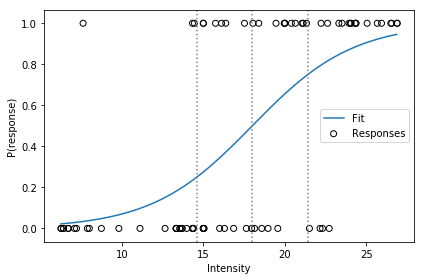

In [6]:
multistair.plot([0.25, 0.5, 0.75])

### Comparison of fitted curve to function used to generate responses

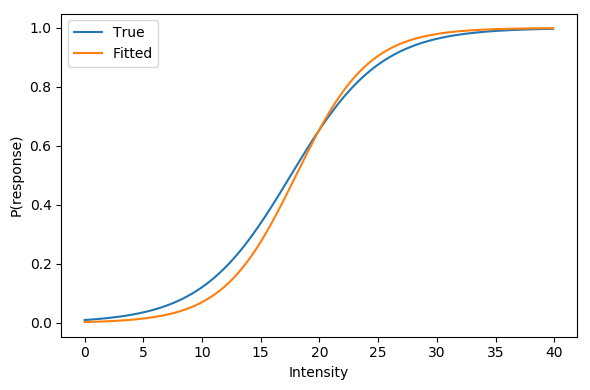

In [7]:
x = np.arange(0, 40, 0.1)
y = MultiStairCase.func(x, 100, 1.3)
y2 = MultiStairCase.func(x, *multistair.popt)
plt.figure(dpi=100)
plt.xlabel("Intensity")
plt.ylabel("P(response)")
plt.plot(x, y, label='True')
plt.plot(x, y2, label='Fitted')
plt.legend()
plt.tight_layout();